# Predicting Loan Approval based on 2021 Loan Application Data from the Federal Financial Institutions Examination Council

### For more context behind data such as the schema, column headers etc. See Below:
        https://ffiec.cfpb.gov/documentation/2021/modified-lar-schema/ 
        https://ffiec.cfpb.gov/documentation/2021/modified-lar-header/ 

        https://github.com/cfpb/hmda-platform/blob/master/docs/spec/markdown/modified_lar/2021_Modified_LAR_Data_Dictionary.md 
        https://ffiec.cfpb.gov/data-publication/documents#modified-lar 

###  Importing Libraries and Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# increasing column width
pd.set_option('display.max_columns', None)

In [3]:
# reading in the data
df = pd.read_csv('2021lar.csv', nrows=5000000)

/var/folders/y9/q82qsl6x2n9gqqmjjm5_8m1w0000gn/T/ipykernel_8438/1989788563.py:2: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2021lar.csv', nrows=5000000)


In [4]:
# look at head
df.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,applicant_ethnicity_2,applicant_ethnicity_3,applicant_ethnicity_4,applicant_ethnicity_5,co_applicant_ethnicity_1,co_applicant_ethnicity_2,co_applicant_ethnicity_3,co_applicant_ethnicity_4,co_applicant_ethnicity_5,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,5493006LH4LKHY2EIN26,15380,NY,36029.0,3.602901e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,2,0,1,1,1,1,2,2,2,425000,51.829,3.0,0.191,3,NaN,NaN,NaN,NaN,NaN,360,NaN,NaN,2,2,2,2,825000,1,1,3,5,1,NaN,159.0,46,2,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,35-44,9999,No,NaN,1,1,2,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,5455,2.51,78900,152.0,1943,2018,31
1,2021,5493006LH4LKHY2EIN26,40380,NY,36051.0,3.605103e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,8,2,1,1,1,2,2,2,95000,95.0,2.875,0.086,2,2817.0,NaN,800.0,NaN,NaN,360,NaN,NaN,2,2,2,2,105000,1,1,3,5,1,NaN,35.0,39,2,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,55-64,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3763,2.02,82900,86.0,1225,1704,67
2,2021,5493006LH4LKHY2EIN26,15380,NY,36029.0,3.602900e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,8,2,1,1,1,2,2,2,95000,96.999,3.125,0.253,2,2847.0,NaN,800.0,NaN,0.04,360,NaN,NaN,2,2,2,2,95000,1,1,3,5,2,NaN,24.0,38,3,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,<25,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,1665,40.00,78900,46.0,312,837,76
3,2021,5493006LH4LKHY2EIN26,15380,NY,36029.0,3.602900e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,4,0,2,1,31,1,2,2,1,125000,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,180,NaN,NaN,2,2,2,2,NaN,1,3,3,5,1,NaN,141.0,NaN,9,9,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,65-74,9999,Yes,NaN,1,1,2,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4212,18.04,78900,137.0,1097,1744,76
4,2021,5493006LH4LKHY2EIN26,21300,NY,36015.0,3.601501e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,3,2,1,1,1,2,2,2,105000,90.0,3.125,0.213,2,3196.6

In [5]:
# look at tail
df.tail()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,applicant_ethnicity_2,applicant_ethnicity_3,applicant_ethnicity_4,applicant_ethnicity_5,co_applicant_ethnicity_1,co_applicant_ethnicity_2,co_applicant_ethnicity_3,co_applicant_ethnicity_4,co_applicant_ethnicity_5,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
4999995,2021,549300IRXW9RSZM2B951,35840,FL,12081.0,1.208100e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,71,2,1,1,1,2,2,2,525000,56.757,3.25,0.186,2,5809.15,NaN,533.75,NaN,656.25,360,NaN,NaN,2,2,2,2,925000,1,1,3,5,1,NaN,88.0,46,3,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,2,5,2,4,35-44,9999,No,NaN,1,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4102,3.78,77200,166.0,1262,1418,15
4999996,2021,549300IRXW9RSZM2B951,22744,FL,12011.0,1.201102e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,White,Male,1,6,2,1,31,1,2,2,2,225000,75.0,2.999,0.375,2,6089.15,NaN,4141.25,2531.25,NaN,360,NaN,NaN,2,2,2,2,305000,1,1,3,5,1,NaN,72.0,42,3,10,1.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,45-54,9999,No,NaN,1,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,6852,47.65,73400,104.0,1896,2056,29
4999997,2021,549300IRXW9RSZM2B951,22744,FL,12011.0,1.201106e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Black or African American,Male,1,71,2,1,1,1,2,2,2,425000,91.965,3.625,0.739,2,4606.9,NaN,557.0,NaN,1053.0,360,NaN,NaN,2,2,2,2,455000,1,1,3,5,1,NaN,145.0,20%-<30%,2,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,3.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,55-64,9999,No,NaN,1,1,2,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,5178,40.90,73400,193.0,1545,1800,28
4999998,2021,549300IRXW9RSZM2B951,22744,FL,12011.0,1.201107e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,6,2,1,32,1,2,2,2,235000,68.841,3.625,0.74,2,5239.9,NaN,2422.5,1187.5,NaN,360,NaN,NaN,2,2,2,2,345000,1,1,3,5,1,NaN,102.0,20%-<30%,1,9,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,2,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,2,2,1,2,2,45-54,45-54,No,No,1,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,5564,44.48,73400,122.0,1391,1843,41
4999999,2021,549300IRXW9RSZM2B951,48424,FL,12099.0,1.209900e+10,C,FHA:First Lien,Single Family (1-4 U

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 99 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   activity_year                             int64  
 1   lei                                       object 
 2   derived_msa_md                            int64  
 3   state_code                                object 
 4   county_code                               float64
 5   census_tract                              float64
 6   conforming_loan_limit                     object 
 7   derived_loan_product_type                 object 
 8   derived_dwelling_category                 object 
 9   derived_ethnicity                         object 
 10  derived_race                              object 
 11  derived_sex                               object 
 12  action_taken                              int64  
 13  purchaser_type                            int64  
 14  pr

In [7]:
# look at shape
df.shape

(5000000, 99)

## Exploratory Data Analysis

In [8]:
# getting desired model features and label
df1 = df[
    ['action_taken',
     'loan_amount',
     'loan_type',
     'loan_purpose',
     'loan_term',
     'preapproval',
     'income',
     'debt_to_income_ratio',
     'applicant_age',
     'occupancy_type',
     'purchaser_type',
     'open_end_line_of_credit'
      ]]

In [9]:
# look at shape
df1.shape

(5000000, 12)

In [10]:
# look at different columns
df1.columns

Index(['action_taken', 'loan_amount', 'loan_type', 'loan_purpose', 'loan_term',
       'preapproval', 'income', 'debt_to_income_ratio', 'applicant_age',
       'occupancy_type', 'purchaser_type', 'open_end_line_of_credit'],
      dtype='object')

In [11]:
# look at actions taken on loan applications
df1['action_taken'].value_counts()

1    2769828
4     729427
6     613558
3     483949
5     256267
2     107242
8      24334
7      15395
Name: action_taken, dtype: int64

<AxesSubplot:>

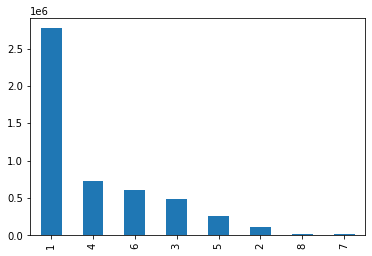

In [12]:
# visualizing actions taken
df1['action_taken'].value_counts().plot(kind = 'bar')

Descriptions:
1. Loan originated
2. Application approved but not accepted
3. Application denied
4. Application withdrawn by applicant
5. File closed for incompleteness
6. Purchased loan
7. Preapproval request denied
8. Preapproval request approved but not accepted

In [13]:
# look at loan types
df1['loan_type'].value_counts()

1    3899710
3     548070
2     500396
4      51824
Name: loan_type, dtype: int64

<AxesSubplot:>

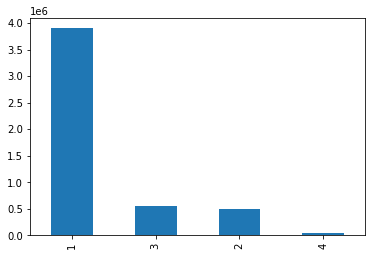

In [14]:
# visualizing loan types
df1['loan_type'].value_counts().plot(kind= 'bar')

Descriptions:
1. Conventional (not insured or guaranteed by FHA VA RHS or FSA)
2. Federal Housing Administration insured (FHA)
3. Veterans Affairs guaranteed (VA)
4. USDA Rural Housing Service or the Farm Service Agency guaranteed (RHS or FSA)

In [15]:
# looking at applicant age
df1['applicant_age'].value_counts()

35-44    1092200
45-54     944098
25-34     836395
55-64     743534
8888      580771
65-74     433169
>74       155617
<25       115871
8888       98304
9999          41
Name: applicant_age, dtype: int64

<AxesSubplot:>

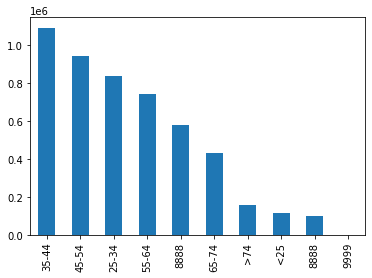

In [16]:
# visualizing applicant age
df1['applicant_age'].value_counts().plot(kind= 'bar')

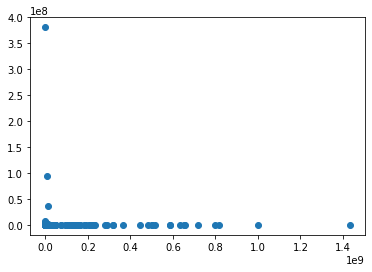

In [17]:
# compare loan amounts and income
plt.scatter(x = 'loan_amount', y= 'income', data=df1)

In [18]:
# get some basic statistics
df1.describe()

,action_taken,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,4.117800e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,2.523797e+00,2.981737e+05,1.350402e+00,1.725638e+01,1.980238e+00,2.667230e+02,1.163161e+00,7.403946e+00,2.891780e+01
std,1.907034e+00,1.735420e+06,7.134684e-01,1.501075e+01,1.391821e-01,1.943977e+05,5.234717e-01,1.992058e+01,1.708361e+02
min,1.000000e+00,5.000000e+03,1.000000e+00,1.000000e+00,1.000000e+00,-1.260000e+05,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.550000e+05,1.000000e+00,1.000000e+00,2.000000e+00,5.900000e+01,1.000000e+00,0.000000e+00,2.000000e+00
50%,1.000000e+00,2.350000e+05,1.000000e+00,3.100000e+01,2.000000e+00,9.000000e+01,1.000000e+00,0.000000e+00,2.000000e+00
75%,4.000000e+00,3.550000e+05,1.000000e+00,3.100000e+01,2.000000e+00,1.400000e+02,1.000000e+00,3.000000e+00,2.000000e+00
max,8.000000e+00,1.432005e+09,4.000000e+00,3.200000e+01,2.000000e+00,3.810000e+08,3.000000e+00,7.200000e+01,1.111000e+03


In [19]:
# see correlation between various features 
df1.corr()

,action_taken,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit
action_taken,1.000000,-0.004033,0.035748,0.038089,-0.086479,-0.000271,-0.034076,-0.273973,-0.074295
loan_amount,-0.004033,1.000000,-0.003768,0.001995,-0.000366,0.001017,0.031185,0.001440,-0.001983
loan_type,0.035748,-0.003768,1.000000,-0.096797,0.016430,-0.000401,-0.137594,0.119848,-0.071671
loan_purpose,0.038089,0.001995,-0.096797,1.000000,0.153771,0.000344,-0.013092,-0.050835,-0.015225
preapproval,-0.086479,-0.000366,0.016430,0.153771,1.000000,0.000129,0.013520,-0.003021,0.000460
income,-0.000271,0.001017,-0.000401,0.000344,0.000129,1.000000,0.002192,-0.000214,-0.000091
occupancy_type,-0.034076,0.031185,-0.137594,-0.013092,0.013520,0.002192,1.000000,-0.006836,0.098349
purchaser_type,-0.273973,0.001440,0.119848,-0.050835,-0.003021,-0.000214,-0.006836,1.000000,-0.037371
open_end_line_of_credit,-0.074295,-0.001983,-0.071671,-0.015225,0.000460,-0.000091,0.098349,-0.037371,1.000000


<AxesSubplot:>

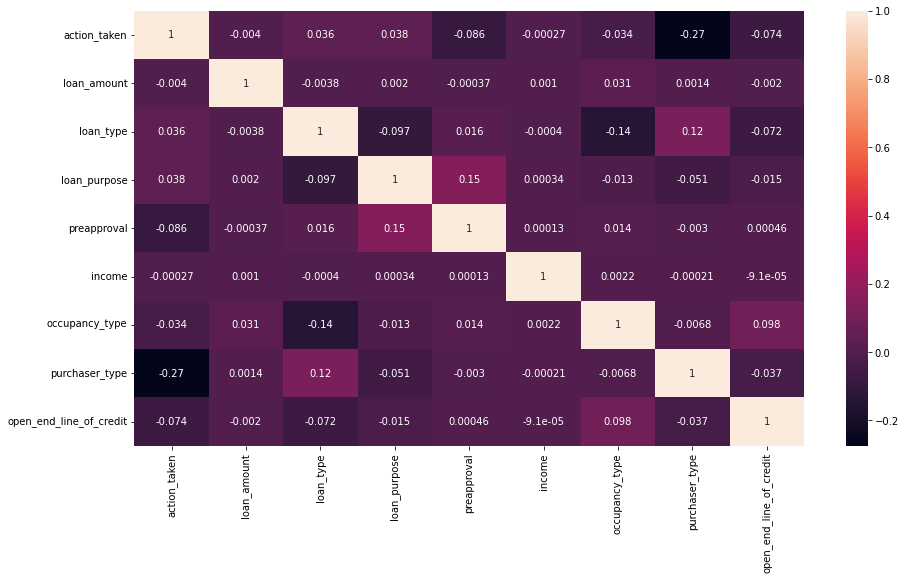

In [20]:
# looking for colinearity
plt.figure(figsize=(15,8))
sns.heatmap(
    data = df1.corr(),
    annot=True,
)

In [21]:
# looking at basic info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 12 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   action_taken             int64  
 1   loan_amount              int64  
 2   loan_type                int64  
 3   loan_purpose             int64  
 4   loan_term                object 
 5   preapproval              int64  
 6   income                   float64
 7   debt_to_income_ratio     object 
 8   applicant_age            object 
 9   occupancy_type           int64  
 10  purchaser_type           int64  
 11  open_end_line_of_credit  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 457.8+ MB


In [22]:
# highlighing data types
df1.dtypes

action_taken                 int64
loan_amount                  int64
loan_type                    int64
loan_purpose                 int64
loan_term                   object
preapproval                  int64
income                     float64
debt_to_income_ratio        object
applicant_age               object
occupancy_type               int64
purchaser_type               int64
open_end_line_of_credit      int64
dtype: object

In [23]:
# converting debt_to_income_ratio and applicant_age from objects to ints for mdoel via dummy transformation
age_dummy = pd.get_dummies(df1['applicant_age'])
dir_dummy = pd.get_dummies(df1['debt_to_income_ratio'])
term_dummy = pd.get_dummies(df1['loan_term'])

In [24]:
# age dummy transformation
age_dummy.head()

,8888,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [25]:
# debt to income ratio dummy transformation
dir_dummy.head()

,41.0,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
term_dummy.head()

,1.0,2.0,3.0,4,5,6.0,7.0,8.0,9.0,10,11.0,12.0,13,14.0,15.0,16.0,18.0,19.0,20,22,23.0,24.0,25.0,26.0,28,29.0,30.0,32,33,34.0,35,36.0,37.0,39.0,40.0,41.0,42.0,46.0,47.0,48.0,49.0,50.0,51,52.0,54,55.0,56.0,57.0,58,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71,72.0,73.0,75.0,76,77.0,78.0,79.0,80.0,82,83,84.0,85.0,86,87.0,88.0,89.0,90.0,93.0,95.0,96.0,97.0,98.0,100,101.0,102,103,104,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114,115,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127,128.0,129,130,131.0,132.0,133,134.0,135.0,136.0,137,138.0,139.0,140.0,141,142,143,144.0,145,146,147.0,148.0,149.0,150.0,151.0,153,154.0,155.0,156.0,157,158.0,159,160.0,161.0,162.0,163.0,164,165.0,166,167.0,168.0,169.0,170.0,171.0,172,173,174.0,175.0,176,177,178.0,179.0,180.0,181,183.0,184.0,186.0,187.0,188.0,189.0,190,191.0,192.0,196,197,198.0,200.0,204.0,205.0,207.0,210,211.0,212,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,225,226.0,227.0,228.0,229,230,231.0,232,233.0,234.0,235,236.0,239.0,240.0,241.0,242,243.0,244.0,246.0,248.0,249.0,250.0,251,252.0,253.0,255.0,256.0,257.0,258.0,260,261,262.0,263,264.0,265.0,266,267,269.0,270.0,271,272.0,273.0,274.0,275,276.0,277,278,279.0,280.0,281.0,282,283,284.0,285.0,286.0,287.0,288.0,289.0,290,291.0,292.0,293,294,295.0,296,297,298.0,299.0,300.0,301,302,303.0,304.0,305,306,307.0,308.0,309.0,310.0,311.0,312.0,313,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321,322,323,324.0,325.0,326.0,327.0,328.0,329.0,330,331,332.0,333,334,335.0,336.0,337.0,338,339.0,340.0,341,342.0,343.0,344,345.0,346.0,347.0,348.0,349.0,350,351.0,352.0,353,354.0,355.0,356.0,357,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367,368.0,369.0,370,371,372.0,373,375.0,378,380.0,384.0,387.0,390.0,414.0,420.0,432.0,461.0,472,480,720.0,864.0,958.0,999.0,1200.0,1801.0,3360,3600.0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,1200,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,198,199,2,20,200,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,233,234,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,290,29000,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,3344,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,3660,367,368,369,3690,37,370,371,372,374,375,378,380,382,383,384,39,390,396,4,40,42,420,425,43,44,45,46,47,48,480,49,5,50,51,52,53,54,540,55,56,57,58,59,6,60,600,605,61,62,620,63,64,65,650,66,67,68,69,7,70,71,72,720,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,999,Exempt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [27]:
# placing dummies back into dataframe
df1 = pd.concat([df1, age_dummy, dir_dummy, term_dummy], axis=1)

In [28]:
df1.head()

,action_taken,loan_amount,loan_type,loan_purpose,loan_term,preapproval,income,debt_to_income_ratio,applicant_age,occupancy_type,purchaser_type,open_end_line_of_credit,8888,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,41.0,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt,1.0,2.0,3.0,4,5,6.0,7.0,8.0,9.0,10,11.0,12.0,13,14.0,15.0,16.0,18.0,19.0,20,22,23.0,24.0,25.0,26.0,28,29.0,30.0,32,33,34.0,35,36.0,37.0,39.0,40.0,41.0,42.0,46.0,47.0,48.0,49.0,50.0,51,52.0,54,55.0,56.0,57.0,58,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71,72.0,73.0,75.0,76,77.0,78.0,79.0,80.0,82,83,84.0,85.0,86,87.0,88.0,89.0,90.0,93.0,95.0,96.0,97.0,98.0,100,101.0,102,103,104,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114,115,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127,128.0,129,130,131.0,132.0,133,134.0,135.0,136.0,137,138.0,139.0,140.0,141,142,143,144.0,145,146,147.0,148.0,149.0,150.0,151.0,153,154.0,155.0,156.0,157,158.0,159,160.0,161.0,162.0,163.0,164,165.0,166,167.0,168.0,169.0,170.0,171.0,172,173,174.0,175.0,176,177,178.0,179.0,180.0,181,183.0,184.0,186.0,187.0,188.0,189.0,190,191.0,192.0,196,197,198.0,200.0,204.0,205.0,207.0,210,211.0,212,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,225,226.0,227.0,228.0,229,230,231.0,232,233.0,234.0,235,236.0,239.0,240.0,241.0,242,243.0,244.0,246.0,248.0,249.0,250.0,251,252.0,253.0,255.0,256.0,257.0,258.0,260,261,262.0,263,264.0,265.0,266,267,269.0,270.0,271,272.0,273.0,274.0,275,276.0,277,278,279.0,280.0,281.0,282,283,284.0,285.0,286.0,287.0,288.0,289.0,290,291.0,292.0,293,294,295.0,296,297,298.0,299.0,300.0,301,302,303.0,304.0,305,306,307.0,308.0,309.0,310.0,311.0,312.0,313,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321,322,323,324.0,325.0,326.0,327.0,328.0,329.0,330,331,332.0,333,334,335.0,336.0,337.0,338,339.0,340.0,341,342.0,343.0,344,345.0,346.0,347.0,348.0,349.0,350,351.0,352.0,353,354.0,355.0,356.0,357,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367,368.0,369.0,370,371,372.0,373,375.0,378,380.0,384.0,387.0,390.0,414.0,420.0,432.0,461.0,472,480,720.0,864.0,958.0,999.0,1200.0,1801.0,3360,3600.0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,1200,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,198,199,2,20,200,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,233,234,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,290,29000,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,3344,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,3660,367,368,369,3690,37,370,371,372,374,375,378,380,382,383,384,39,390,396,4,40,42,420,425,43,44,45,46,47,48,480,49,5,50,51,52,53,54,540,55,56,57,58,59,6,60,600,605,61,62,620,63,64,65,650,66,67,68,69,7,70,71,72,720,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,999,Exempt
0,2,425000,1,1,360,1,159.0,46,35-44,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [29]:
# removing oringinal columns with string values
df1 = df1.drop(columns=['debt_to_income_ratio', 'applicant_age', 'loan_term'])

In [30]:
# looking at head
df1.head()

,action_taken,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,8888,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,41.0,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt,1.0,2.0,3.0,4,5,6.0,7.0,8.0,9.0,10,11.0,12.0,13,14.0,15.0,16.0,18.0,19.0,20,22,23.0,24.0,25.0,26.0,28,29.0,30.0,32,33,34.0,35,36.0,37.0,39.0,40.0,41.0,42.0,46.0,47.0,48.0,49.0,50.0,51,52.0,54,55.0,56.0,57.0,58,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71,72.0,73.0,75.0,76,77.0,78.0,79.0,80.0,82,83,84.0,85.0,86,87.0,88.0,89.0,90.0,93.0,95.0,96.0,97.0,98.0,100,101.0,102,103,104,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114,115,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127,128.0,129,130,131.0,132.0,133,134.0,135.0,136.0,137,138.0,139.0,140.0,141,142,143,144.0,145,146,147.0,148.0,149.0,150.0,151.0,153,154.0,155.0,156.0,157,158.0,159,160.0,161.0,162.0,163.0,164,165.0,166,167.0,168.0,169.0,170.0,171.0,172,173,174.0,175.0,176,177,178.0,179.0,180.0,181,183.0,184.0,186.0,187.0,188.0,189.0,190,191.0,192.0,196,197,198.0,200.0,204.0,205.0,207.0,210,211.0,212,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,225,226.0,227.0,228.0,229,230,231.0,232,233.0,234.0,235,236.0,239.0,240.0,241.0,242,243.0,244.0,246.0,248.0,249.0,250.0,251,252.0,253.0,255.0,256.0,257.0,258.0,260,261,262.0,263,264.0,265.0,266,267,269.0,270.0,271,272.0,273.0,274.0,275,276.0,277,278,279.0,280.0,281.0,282,283,284.0,285.0,286.0,287.0,288.0,289.0,290,291.0,292.0,293,294,295.0,296,297,298.0,299.0,300.0,301,302,303.0,304.0,305,306,307.0,308.0,309.0,310.0,311.0,312.0,313,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321,322,323,324.0,325.0,326.0,327.0,328.0,329.0,330,331,332.0,333,334,335.0,336.0,337.0,338,339.0,340.0,341,342.0,343.0,344,345.0,346.0,347.0,348.0,349.0,350,351.0,352.0,353,354.0,355.0,356.0,357,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367,368.0,369.0,370,371,372.0,373,375.0,378,380.0,384.0,387.0,390.0,414.0,420.0,432.0,461.0,472,480,720.0,864.0,958.0,999.0,1200.0,1801.0,3360,3600.0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,1200,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,198,199,2,20,200,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,233,234,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,290,29000,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,3344,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,3660,367,368,369,3690,37,370,371,372,374,375,378,380,382,383,384,39,390,396,4,40,42,420,425,43,44,45,46,47,48,480,49,5,50,51,52,53,54,540,55,56,57,58,59,6,60,600,605,61,62,620,63,64,65,650,66,67,68,69,7,70,71,72,720,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,999,Exempt
0,2,425000,1,1,1,159.0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [31]:
df1['action_taken'].value_counts()

1    2769828
4     729427
6     613558
3     483949
5     256267
2     107242
8      24334
7      15395
Name: action_taken, dtype: int64

Descriptions:
1. Loan originated
2. Application approved but not accepted
3. Application denied
4. Application withdrawn by applicant
5. File closed for incompleteness
6. Purchased loan
7. Preapproval request denied
8. Preapproval request approved but not accepted

<AxesSubplot:>

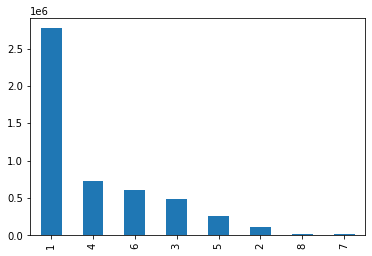

In [32]:
# visualizing actions taken
df1['action_taken'].value_counts().plot(kind = 'bar')

In [33]:
# creating approval columnn, rows take value 1 if approved 0 if denied
df1['Approval'] = np.NaN
df1.loc[df1['action_taken'] == 1.0, 'Approval'] = 1
df1.loc[df1['action_taken'] == 2.0, 'Approval'] = 1
df1.loc[df1['action_taken'] == 3.0, 'Approval'] = 0

In [34]:
df1.head()

,action_taken,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,8888,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,41.0,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt,1.0,2.0,3.0,4,5,6.0,7.0,8.0,9.0,10,11.0,12.0,13,14.0,15.0,16.0,18.0,19.0,20,22,23.0,24.0,25.0,26.0,28,29.0,30.0,32,33,34.0,35,36.0,37.0,39.0,40.0,41.0,42.0,46.0,47.0,48.0,49.0,50.0,51,52.0,54,55.0,56.0,57.0,58,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71,72.0,73.0,75.0,76,77.0,78.0,79.0,80.0,82,83,84.0,85.0,86,87.0,88.0,89.0,90.0,93.0,95.0,96.0,97.0,98.0,100,101.0,102,103,104,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114,115,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127,128.0,129,130,131.0,132.0,133,134.0,135.0,136.0,137,138.0,139.0,140.0,141,142,143,144.0,145,146,147.0,148.0,149.0,150.0,151.0,153,154.0,155.0,156.0,157,158.0,159,160.0,161.0,162.0,163.0,164,165.0,166,167.0,168.0,169.0,170.0,171.0,172,173,174.0,175.0,176,177,178.0,179.0,180.0,181,183.0,184.0,186.0,187.0,188.0,189.0,190,191.0,192.0,196,197,198.0,200.0,204.0,205.0,207.0,210,211.0,212,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,225,226.0,227.0,228.0,229,230,231.0,232,233.0,234.0,235,236.0,239.0,240.0,241.0,242,243.0,244.0,246.0,248.0,249.0,250.0,251,252.0,253.0,255.0,256.0,257.0,258.0,260,261,262.0,263,264.0,265.0,266,267,269.0,270.0,271,272.0,273.0,274.0,275,276.0,277,278,279.0,280.0,281.0,282,283,284.0,285.0,286.0,287.0,288.0,289.0,290,291.0,292.0,293,294,295.0,296,297,298.0,299.0,300.0,301,302,303.0,304.0,305,306,307.0,308.0,309.0,310.0,311.0,312.0,313,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321,322,323,324.0,325.0,326.0,327.0,328.0,329.0,330,331,332.0,333,334,335.0,336.0,337.0,338,339.0,340.0,341,342.0,343.0,344,345.0,346.0,347.0,348.0,349.0,350,351.0,352.0,353,354.0,355.0,356.0,357,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367,368.0,369.0,370,371,372.0,373,375.0,378,380.0,384.0,387.0,390.0,414.0,420.0,432.0,461.0,472,480,720.0,864.0,958.0,999.0,1200.0,1801.0,3360,3600.0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,1200,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,198,199,2,20,200,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,233,234,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,290,29000,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,3344,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,3660,367,368,369,3690,37,370,371,372,374,375,378,380,382,383,384,39,390,396,4,40,42,420,425,43,44,45,46,47,48,480,49,5,50,51,52,53,54,540,55,56,57,58,59,6,60,600,605,61,62,620,63,64,65,650,66,67,68,69,7,70,71,72,720,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,999,Exempt,Approval
0,2,425000,1,1,1,159.0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [35]:
# looking at approval column
df1[['Approval']]

,Approval
0,1.0
1,1.0
2,1.0
3,NaN
4,1.0
...,...
4999995,1.0
4999996,1.0
4999997,1.0
4999998,1.0


In [36]:
# dropping null values
df1 = df1.dropna()

In [37]:
# looking at division of approval vs rejection
df1['Approval'].value_counts()

1.0    2687960
0.0     453040
Name: Approval, dtype: int64

In [38]:
df1.pop('action_taken')

0          2
1          1
2          1
4          1
6          1
          ..
4999995    1
4999996    1
4999997    1
4999998    1
4999999    1
Name: action_taken, Length: 3141000, dtype: int64

In [39]:
df1.head()

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,8888,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,41.0,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt,1.0,2.0,3.0,4,5,6.0,7.0,8.0,9.0,10,11.0,12.0,13,14.0,15.0,16.0,18.0,19.0,20,22,23.0,24.0,25.0,26.0,28,29.0,30.0,32,33,34.0,35,36.0,37.0,39.0,40.0,41.0,42.0,46.0,47.0,48.0,49.0,50.0,51,52.0,54,55.0,56.0,57.0,58,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71,72.0,73.0,75.0,76,77.0,78.0,79.0,80.0,82,83,84.0,85.0,86,87.0,88.0,89.0,90.0,93.0,95.0,96.0,97.0,98.0,100,101.0,102,103,104,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114,115,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127,128.0,129,130,131.0,132.0,133,134.0,135.0,136.0,137,138.0,139.0,140.0,141,142,143,144.0,145,146,147.0,148.0,149.0,150.0,151.0,153,154.0,155.0,156.0,157,158.0,159,160.0,161.0,162.0,163.0,164,165.0,166,167.0,168.0,169.0,170.0,171.0,172,173,174.0,175.0,176,177,178.0,179.0,180.0,181,183.0,184.0,186.0,187.0,188.0,189.0,190,191.0,192.0,196,197,198.0,200.0,204.0,205.0,207.0,210,211.0,212,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,225,226.0,227.0,228.0,229,230,231.0,232,233.0,234.0,235,236.0,239.0,240.0,241.0,242,243.0,244.0,246.0,248.0,249.0,250.0,251,252.0,253.0,255.0,256.0,257.0,258.0,260,261,262.0,263,264.0,265.0,266,267,269.0,270.0,271,272.0,273.0,274.0,275,276.0,277,278,279.0,280.0,281.0,282,283,284.0,285.0,286.0,287.0,288.0,289.0,290,291.0,292.0,293,294,295.0,296,297,298.0,299.0,300.0,301,302,303.0,304.0,305,306,307.0,308.0,309.0,310.0,311.0,312.0,313,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321,322,323,324.0,325.0,326.0,327.0,328.0,329.0,330,331,332.0,333,334,335.0,336.0,337.0,338,339.0,340.0,341,342.0,343.0,344,345.0,346.0,347.0,348.0,349.0,350,351.0,352.0,353,354.0,355.0,356.0,357,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367,368.0,369.0,370,371,372.0,373,375.0,378,380.0,384.0,387.0,390.0,414.0,420.0,432.0,461.0,472,480,720.0,864.0,958.0,999.0,1200.0,1801.0,3360,3600.0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,1200,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,198,199,2,20,200,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,233,234,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,290,29000,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,3344,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,3660,367,368,369,3690,37,370,371,372,374,375,378,380,382,383,384,39,390,396,4,40,42,420,425,43,44,45,46,47,48,480,49,5,50,51,52,53,54,540,55,56,57,58,59,6,60,600,605,61,62,620,63,64,65,650,66,67,68,69,7,70,71,72,720,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,999,Exempt,Approval
0,425000,1,1,1,159.0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Data is disprortionate, since class 0 has disproportionately less observations than class 1, the model may get yield a "high" accuracy by predicting more of class 1 due to the disproportionate data as opposed to using the model features. Hence, undersampling may be an effective way to mitigate this issue by reducing the number of observations of class 1

In [40]:
# creating approved and reject dataframes
df1_approved = df1[df1['Approval'] == 1].reset_index(drop=True)
df1_rejected = df1[df1['Approval'] == 0].reset_index(drop=True)

In [41]:
# looking at approved counts
df1_approved['Approval'].count()

2687960

In [42]:
# looking at rejected counts
df1_rejected['Approval'].count()

453040

In [43]:
df1_approved

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,8888,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,41.0,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt,1.0,2.0,3.0,4,5,6.0,7.0,8.0,9.0,10,11.0,12.0,13,14.0,15.0,16.0,18.0,19.0,20,22,23.0,24.0,25.0,26.0,28,29.0,30.0,32,33,34.0,35,36.0,37.0,39.0,40.0,41.0,42.0,46.0,47.0,48.0,49.0,50.0,51,52.0,54,55.0,56.0,57.0,58,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71,72.0,73.0,75.0,76,77.0,78.0,79.0,80.0,82,83,84.0,85.0,86,87.0,88.0,89.0,90.0,93.0,95.0,96.0,97.0,98.0,100,101.0,102,103,104,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114,115,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127,128.0,129,130,131.0,132.0,133,134.0,135.0,136.0,137,138.0,139.0,140.0,141,142,143,144.0,145,146,147.0,148.0,149.0,150.0,151.0,153,154.0,155.0,156.0,157,158.0,159,160.0,161.0,162.0,163.0,164,165.0,166,167.0,168.0,169.0,170.0,171.0,172,173,174.0,175.0,176,177,178.0,179.0,180.0,181,183.0,184.0,186.0,187.0,188.0,189.0,190,191.0,192.0,196,197,198.0,200.0,204.0,205.0,207.0,210,211.0,212,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,225,226.0,227.0,228.0,229,230,231.0,232,233.0,234.0,235,236.0,239.0,240.0,241.0,242,243.0,244.0,246.0,248.0,249.0,250.0,251,252.0,253.0,255.0,256.0,257.0,258.0,260,261,262.0,263,264.0,265.0,266,267,269.0,270.0,271,272.0,273.0,274.0,275,276.0,277,278,279.0,280.0,281.0,282,283,284.0,285.0,286.0,287.0,288.0,289.0,290,291.0,292.0,293,294,295.0,296,297,298.0,299.0,300.0,301,302,303.0,304.0,305,306,307.0,308.0,309.0,310.0,311.0,312.0,313,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321,322,323,324.0,325.0,326.0,327.0,328.0,329.0,330,331,332.0,333,334,335.0,336.0,337.0,338,339.0,340.0,341,342.0,343.0,344,345.0,346.0,347.0,348.0,349.0,350,351.0,352.0,353,354.0,355.0,356.0,357,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367,368.0,369.0,370,371,372.0,373,375.0,378,380.0,384.0,387.0,390.0,414.0,420.0,432.0,461.0,472,480,720.0,864.0,958.0,999.0,1200.0,1801.0,3360,3600.0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,1200,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,198,199,2,20,200,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,233,234,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,290,29000,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,3344,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,3660,367,368,369,3690,37,370,371,372,374,375,378,380,382,383,384,39,390,396,4,40,42,420,425,43,44,45,46,47,48,480,49,5,50,51,52,53,54,540,55,56,57,58,59,6,60,600,605,61,62,620,63,64,65,650,66,67,68,69,7,70,71,72,720,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,999,Exempt,Approval
0,425000,1,1,1,159.0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [44]:
df1_rejected

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,8888,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,41.0,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt,1.0,2.0,3.0,4,5,6.0,7.0,8.0,9.0,10,11.0,12.0,13,14.0,15.0,16.0,18.0,19.0,20,22,23.0,24.0,25.0,26.0,28,29.0,30.0,32,33,34.0,35,36.0,37.0,39.0,40.0,41.0,42.0,46.0,47.0,48.0,49.0,50.0,51,52.0,54,55.0,56.0,57.0,58,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71,72.0,73.0,75.0,76,77.0,78.0,79.0,80.0,82,83,84.0,85.0,86,87.0,88.0,89.0,90.0,93.0,95.0,96.0,97.0,98.0,100,101.0,102,103,104,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114,115,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127,128.0,129,130,131.0,132.0,133,134.0,135.0,136.0,137,138.0,139.0,140.0,141,142,143,144.0,145,146,147.0,148.0,149.0,150.0,151.0,153,154.0,155.0,156.0,157,158.0,159,160.0,161.0,162.0,163.0,164,165.0,166,167.0,168.0,169.0,170.0,171.0,172,173,174.0,175.0,176,177,178.0,179.0,180.0,181,183.0,184.0,186.0,187.0,188.0,189.0,190,191.0,192.0,196,197,198.0,200.0,204.0,205.0,207.0,210,211.0,212,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,225,226.0,227.0,228.0,229,230,231.0,232,233.0,234.0,235,236.0,239.0,240.0,241.0,242,243.0,244.0,246.0,248.0,249.0,250.0,251,252.0,253.0,255.0,256.0,257.0,258.0,260,261,262.0,263,264.0,265.0,266,267,269.0,270.0,271,272.0,273.0,274.0,275,276.0,277,278,279.0,280.0,281.0,282,283,284.0,285.0,286.0,287.0,288.0,289.0,290,291.0,292.0,293,294,295.0,296,297,298.0,299.0,300.0,301,302,303.0,304.0,305,306,307.0,308.0,309.0,310.0,311.0,312.0,313,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321,322,323,324.0,325.0,326.0,327.0,328.0,329.0,330,331,332.0,333,334,335.0,336.0,337.0,338,339.0,340.0,341,342.0,343.0,344,345.0,346.0,347.0,348.0,349.0,350,351.0,352.0,353,354.0,355.0,356.0,357,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367,368.0,369.0,370,371,372.0,373,375.0,378,380.0,384.0,387.0,390.0,414.0,420.0,432.0,461.0,472,480,720.0,864.0,958.0,999.0,1200.0,1801.0,3360,3600.0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,1200,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,198,199,2,20,200,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,233,234,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,290,29000,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,3344,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,3660,367,368,369,3690,37,370,371,372,374,375,378,380,382,383,384,39,390,396,4,40,42,420,425,43,44,45,46,47,48,480,49,5,50,51,52,53,54,540,55,56,57,58,59,6,60,600,605,61,62,620,63,64,65,650,66,67,68,69,7,70,71,72,720,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,999,Exempt,Approval
0,145000,1,1,2,30.0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [45]:
from sklearn.utils import resample

In [46]:
# making the sample size equivalent to size of underperesented class (class 0)
sample_size = len(df1_rejected)

In [47]:
# take the random sample
approved_sample = resample(df1_approved, replace=False, n_samples=sample_size)
rejected_sample = resample(df1_rejected, replace=False, n_samples=sample_size)

In [48]:
approved_sample

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,8888,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,41.0,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt,1.0,2.0,3.0,4,5,6.0,7.0,8.0,9.0,10,11.0,12.0,13,14.0,15.0,16.0,18.0,19.0,20,22,23.0,24.0,25.0,26.0,28,29.0,30.0,32,33,34.0,35,36.0,37.0,39.0,40.0,41.0,42.0,46.0,47.0,48.0,49.0,50.0,51,52.0,54,55.0,56.0,57.0,58,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71,72.0,73.0,75.0,76,77.0,78.0,79.0,80.0,82,83,84.0,85.0,86,87.0,88.0,89.0,90.0,93.0,95.0,96.0,97.0,98.0,100,101.0,102,103,104,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114,115,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127,128.0,129,130,131.0,132.0,133,134.0,135.0,136.0,137,138.0,139.0,140.0,141,142,143,144.0,145,146,147.0,148.0,149.0,150.0,151.0,153,154.0,155.0,156.0,157,158.0,159,160.0,161.0,162.0,163.0,164,165.0,166,167.0,168.0,169.0,170.0,171.0,172,173,174.0,175.0,176,177,178.0,179.0,180.0,181,183.0,184.0,186.0,187.0,188.0,189.0,190,191.0,192.0,196,197,198.0,200.0,204.0,205.0,207.0,210,211.0,212,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,225,226.0,227.0,228.0,229,230,231.0,232,233.0,234.0,235,236.0,239.0,240.0,241.0,242,243.0,244.0,246.0,248.0,249.0,250.0,251,252.0,253.0,255.0,256.0,257.0,258.0,260,261,262.0,263,264.0,265.0,266,267,269.0,270.0,271,272.0,273.0,274.0,275,276.0,277,278,279.0,280.0,281.0,282,283,284.0,285.0,286.0,287.0,288.0,289.0,290,291.0,292.0,293,294,295.0,296,297,298.0,299.0,300.0,301,302,303.0,304.0,305,306,307.0,308.0,309.0,310.0,311.0,312.0,313,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321,322,323,324.0,325.0,326.0,327.0,328.0,329.0,330,331,332.0,333,334,335.0,336.0,337.0,338,339.0,340.0,341,342.0,343.0,344,345.0,346.0,347.0,348.0,349.0,350,351.0,352.0,353,354.0,355.0,356.0,357,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367,368.0,369.0,370,371,372.0,373,375.0,378,380.0,384.0,387.0,390.0,414.0,420.0,432.0,461.0,472,480,720.0,864.0,958.0,999.0,1200.0,1801.0,3360,3600.0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,1200,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,198,199,2,20,200,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,233,234,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,290,29000,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,3344,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,3660,367,368,369,3690,37,370,371,372,374,375,378,380,382,383,384,39,390,396,4,40,42,420,425,43,44,45,46,47,48,480,49,5,50,51,52,53,54,540,55,56,57,58,59,6,60,600,605,61,62,620,63,64,65,650,66,67,68,69,7,70,71,72,720,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,999,Exempt,Approval
557771,155000,1,4,2,151.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [49]:
rejected_sample

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,8888,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,41.0,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt,1.0,2.0,3.0,4,5,6.0,7.0,8.0,9.0,10,11.0,12.0,13,14.0,15.0,16.0,18.0,19.0,20,22,23.0,24.0,25.0,26.0,28,29.0,30.0,32,33,34.0,35,36.0,37.0,39.0,40.0,41.0,42.0,46.0,47.0,48.0,49.0,50.0,51,52.0,54,55.0,56.0,57.0,58,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71,72.0,73.0,75.0,76,77.0,78.0,79.0,80.0,82,83,84.0,85.0,86,87.0,88.0,89.0,90.0,93.0,95.0,96.0,97.0,98.0,100,101.0,102,103,104,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114,115,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127,128.0,129,130,131.0,132.0,133,134.0,135.0,136.0,137,138.0,139.0,140.0,141,142,143,144.0,145,146,147.0,148.0,149.0,150.0,151.0,153,154.0,155.0,156.0,157,158.0,159,160.0,161.0,162.0,163.0,164,165.0,166,167.0,168.0,169.0,170.0,171.0,172,173,174.0,175.0,176,177,178.0,179.0,180.0,181,183.0,184.0,186.0,187.0,188.0,189.0,190,191.0,192.0,196,197,198.0,200.0,204.0,205.0,207.0,210,211.0,212,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,225,226.0,227.0,228.0,229,230,231.0,232,233.0,234.0,235,236.0,239.0,240.0,241.0,242,243.0,244.0,246.0,248.0,249.0,250.0,251,252.0,253.0,255.0,256.0,257.0,258.0,260,261,262.0,263,264.0,265.0,266,267,269.0,270.0,271,272.0,273.0,274.0,275,276.0,277,278,279.0,280.0,281.0,282,283,284.0,285.0,286.0,287.0,288.0,289.0,290,291.0,292.0,293,294,295.0,296,297,298.0,299.0,300.0,301,302,303.0,304.0,305,306,307.0,308.0,309.0,310.0,311.0,312.0,313,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321,322,323,324.0,325.0,326.0,327.0,328.0,329.0,330,331,332.0,333,334,335.0,336.0,337.0,338,339.0,340.0,341,342.0,343.0,344,345.0,346.0,347.0,348.0,349.0,350,351.0,352.0,353,354.0,355.0,356.0,357,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367,368.0,369.0,370,371,372.0,373,375.0,378,380.0,384.0,387.0,390.0,414.0,420.0,432.0,461.0,472,480,720.0,864.0,958.0,999.0,1200.0,1801.0,3360,3600.0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,1200,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,198,199,2,20,200,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,233,234,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,290,29000,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,3344,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,3660,367,368,369,3690,37,370,371,372,374,375,378,380,382,383,384,39,390,396,4,40,42,420,425,43,44,45,46,47,48,480,49,5,50,51,52,53,54,540,55,56,57,58,59,6,60,600,605,61,62,620,63,64,65,650,66,67,68,69,7,70,71,72,720,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,999,Exempt,Approval
114418,365000,3,32,2,112.0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [50]:
# combining both samples to 1 datframe
random_sample = pd.concat([approved_sample, rejected_sample]).reset_index(drop = True)

In [51]:
random_sample

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,8888,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,41.0,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt,1.0,2.0,3.0,4,5,6.0,7.0,8.0,9.0,10,11.0,12.0,13,14.0,15.0,16.0,18.0,19.0,20,22,23.0,24.0,25.0,26.0,28,29.0,30.0,32,33,34.0,35,36.0,37.0,39.0,40.0,41.0,42.0,46.0,47.0,48.0,49.0,50.0,51,52.0,54,55.0,56.0,57.0,58,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71,72.0,73.0,75.0,76,77.0,78.0,79.0,80.0,82,83,84.0,85.0,86,87.0,88.0,89.0,90.0,93.0,95.0,96.0,97.0,98.0,100,101.0,102,103,104,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114,115,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127,128.0,129,130,131.0,132.0,133,134.0,135.0,136.0,137,138.0,139.0,140.0,141,142,143,144.0,145,146,147.0,148.0,149.0,150.0,151.0,153,154.0,155.0,156.0,157,158.0,159,160.0,161.0,162.0,163.0,164,165.0,166,167.0,168.0,169.0,170.0,171.0,172,173,174.0,175.0,176,177,178.0,179.0,180.0,181,183.0,184.0,186.0,187.0,188.0,189.0,190,191.0,192.0,196,197,198.0,200.0,204.0,205.0,207.0,210,211.0,212,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,225,226.0,227.0,228.0,229,230,231.0,232,233.0,234.0,235,236.0,239.0,240.0,241.0,242,243.0,244.0,246.0,248.0,249.0,250.0,251,252.0,253.0,255.0,256.0,257.0,258.0,260,261,262.0,263,264.0,265.0,266,267,269.0,270.0,271,272.0,273.0,274.0,275,276.0,277,278,279.0,280.0,281.0,282,283,284.0,285.0,286.0,287.0,288.0,289.0,290,291.0,292.0,293,294,295.0,296,297,298.0,299.0,300.0,301,302,303.0,304.0,305,306,307.0,308.0,309.0,310.0,311.0,312.0,313,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321,322,323,324.0,325.0,326.0,327.0,328.0,329.0,330,331,332.0,333,334,335.0,336.0,337.0,338,339.0,340.0,341,342.0,343.0,344,345.0,346.0,347.0,348.0,349.0,350,351.0,352.0,353,354.0,355.0,356.0,357,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367,368.0,369.0,370,371,372.0,373,375.0,378,380.0,384.0,387.0,390.0,414.0,420.0,432.0,461.0,472,480,720.0,864.0,958.0,999.0,1200.0,1801.0,3360,3600.0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,1200,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,198,199,2,20,200,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,233,234,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,290,29000,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,3344,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,3660,367,368,369,3690,37,370,371,372,374,375,378,380,382,383,384,39,390,396,4,40,42,420,425,43,44,45,46,47,48,480,49,5,50,51,52,53,54,540,55,56,57,58,59,6,60,600,605,61,62,620,63,64,65,650,66,67,68,69,7,70,71,72,720,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,999,Exempt,Approval
0,155000,1,4,2,151.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [52]:
# creating a copy to split to features and labels
sample = random_sample.copy()

In [53]:
# splitting the label 
label = sample.pop('Approval')
label = pd.DataFrame(label)
label

,Approval
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
906075,0.0
906076,0.0
906077,0.0
906078,0.0


In [54]:
# remaining columns are features
features = sample
features

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,8888,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,41.0,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt,1.0,2.0,3.0,4,5,6.0,7.0,8.0,9.0,10,11.0,12.0,13,14.0,15.0,16.0,18.0,19.0,20,22,23.0,24.0,25.0,26.0,28,29.0,30.0,32,33,34.0,35,36.0,37.0,39.0,40.0,41.0,42.0,46.0,47.0,48.0,49.0,50.0,51,52.0,54,55.0,56.0,57.0,58,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71,72.0,73.0,75.0,76,77.0,78.0,79.0,80.0,82,83,84.0,85.0,86,87.0,88.0,89.0,90.0,93.0,95.0,96.0,97.0,98.0,100,101.0,102,103,104,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114,115,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127,128.0,129,130,131.0,132.0,133,134.0,135.0,136.0,137,138.0,139.0,140.0,141,142,143,144.0,145,146,147.0,148.0,149.0,150.0,151.0,153,154.0,155.0,156.0,157,158.0,159,160.0,161.0,162.0,163.0,164,165.0,166,167.0,168.0,169.0,170.0,171.0,172,173,174.0,175.0,176,177,178.0,179.0,180.0,181,183.0,184.0,186.0,187.0,188.0,189.0,190,191.0,192.0,196,197,198.0,200.0,204.0,205.0,207.0,210,211.0,212,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,225,226.0,227.0,228.0,229,230,231.0,232,233.0,234.0,235,236.0,239.0,240.0,241.0,242,243.0,244.0,246.0,248.0,249.0,250.0,251,252.0,253.0,255.0,256.0,257.0,258.0,260,261,262.0,263,264.0,265.0,266,267,269.0,270.0,271,272.0,273.0,274.0,275,276.0,277,278,279.0,280.0,281.0,282,283,284.0,285.0,286.0,287.0,288.0,289.0,290,291.0,292.0,293,294,295.0,296,297,298.0,299.0,300.0,301,302,303.0,304.0,305,306,307.0,308.0,309.0,310.0,311.0,312.0,313,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321,322,323,324.0,325.0,326.0,327.0,328.0,329.0,330,331,332.0,333,334,335.0,336.0,337.0,338,339.0,340.0,341,342.0,343.0,344,345.0,346.0,347.0,348.0,349.0,350,351.0,352.0,353,354.0,355.0,356.0,357,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367,368.0,369.0,370,371,372.0,373,375.0,378,380.0,384.0,387.0,390.0,414.0,420.0,432.0,461.0,472,480,720.0,864.0,958.0,999.0,1200.0,1801.0,3360,3600.0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,1200,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,198,199,2,20,200,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,233,234,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,290,29000,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,3344,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,3660,367,368,369,3690,37,370,371,372,374,375,378,380,382,383,384,39,390,396,4,40,42,420,425,43,44,45,46,47,48,480,49,5,50,51,52,53,54,540,55,56,57,58,59,6,60,600,605,61,62,620,63,64,65,650,66,67,68,69,7,70,71,72,720,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,999,Exempt
0,155000,1,4,2,151.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [55]:
# importing ML object and functions
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

In [56]:
# 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=40, test_size=0.2)

In [57]:
X_train

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,8888,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,41.0,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt,1.0,2.0,3.0,4,5,6.0,7.0,8.0,9.0,10,11.0,12.0,13,14.0,15.0,16.0,18.0,19.0,20,22,23.0,24.0,25.0,26.0,28,29.0,30.0,32,33,34.0,35,36.0,37.0,39.0,40.0,41.0,42.0,46.0,47.0,48.0,49.0,50.0,51,52.0,54,55.0,56.0,57.0,58,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71,72.0,73.0,75.0,76,77.0,78.0,79.0,80.0,82,83,84.0,85.0,86,87.0,88.0,89.0,90.0,93.0,95.0,96.0,97.0,98.0,100,101.0,102,103,104,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114,115,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127,128.0,129,130,131.0,132.0,133,134.0,135.0,136.0,137,138.0,139.0,140.0,141,142,143,144.0,145,146,147.0,148.0,149.0,150.0,151.0,153,154.0,155.0,156.0,157,158.0,159,160.0,161.0,162.0,163.0,164,165.0,166,167.0,168.0,169.0,170.0,171.0,172,173,174.0,175.0,176,177,178.0,179.0,180.0,181,183.0,184.0,186.0,187.0,188.0,189.0,190,191.0,192.0,196,197,198.0,200.0,204.0,205.0,207.0,210,211.0,212,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,225,226.0,227.0,228.0,229,230,231.0,232,233.0,234.0,235,236.0,239.0,240.0,241.0,242,243.0,244.0,246.0,248.0,249.0,250.0,251,252.0,253.0,255.0,256.0,257.0,258.0,260,261,262.0,263,264.0,265.0,266,267,269.0,270.0,271,272.0,273.0,274.0,275,276.0,277,278,279.0,280.0,281.0,282,283,284.0,285.0,286.0,287.0,288.0,289.0,290,291.0,292.0,293,294,295.0,296,297,298.0,299.0,300.0,301,302,303.0,304.0,305,306,307.0,308.0,309.0,310.0,311.0,312.0,313,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321,322,323,324.0,325.0,326.0,327.0,328.0,329.0,330,331,332.0,333,334,335.0,336.0,337.0,338,339.0,340.0,341,342.0,343.0,344,345.0,346.0,347.0,348.0,349.0,350,351.0,352.0,353,354.0,355.0,356.0,357,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367,368.0,369.0,370,371,372.0,373,375.0,378,380.0,384.0,387.0,390.0,414.0,420.0,432.0,461.0,472,480,720.0,864.0,958.0,999.0,1200.0,1801.0,3360,3600.0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,1200,121,122,123,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,147,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,168,169,17,170,171,172,173,174,175,176,177,178,179,18,180,181,182,183,184,185,186,187,188,189,19,190,191,192,193,194,195,196,198,199,2,20,200,202,203,204,205,206,207,208,209,21,210,211,212,213,214,215,216,217,218,219,22,220,221,222,223,224,225,226,227,228,229,23,230,233,234,236,237,238,239,24,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,26,260,261,262,263,264,265,266,267,268,269,27,270,271,272,273,274,275,276,277,278,279,28,280,281,282,283,284,285,286,287,288,289,290,29000,291,292,293,294,295,296,297,298,299,3,30,300,301,302,303,304,305,306,307,308,309,31,310,312,313,314,315,316,317,318,319,32,320,321,322,323,324,325,326,327,328,329,33,330,331,332,333,334,3344,335,336,337,338,339,34,340,341,342,343,344,345,346,347,348,349,35,350,351,352,353,354,355,356,357,358,359,36,360,361,362,363,364,365,366,3660,367,368,369,3690,37,370,371,372,374,375,378,380,382,383,384,39,390,396,4,40,42,420,425,43,44,45,46,47,48,480,49,5,50,51,52,53,54,540,55,56,57,58,59,6,60,600,605,61,62,620,63,64,65,650,66,67,68,69,7,70,71,72,720,73,74,75,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,96,97,98,99,999,Exempt
180332,25000,1,2,2,36.0,1,71,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [58]:
y_train

,Approval
180332,1.0
520254,0.0
313382,1.0
687621,0.0
735179,0.0
...,...
843192,0.0
879608,0.0
473253,0.0
817159,0.0


In [59]:
X_train.shape

(724864, 783)

In [60]:
y_train.shape

(724864, 1)

In [61]:
X_test.shape

(181216, 783)

In [62]:
y_test.shape

(181216, 1)

In [84]:
sam = y_test[0:100000]

In [86]:
sam2 = X_test[0:100000]

In [87]:
# creating knn object
knn = KNeighborsClassifier()

In [88]:
# training the knn model
knn.fit(X_train, y_train)

/Users/Ishan/Library/Python/3.10/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/Ishan/Library/Python/3.10/lib/python/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [89]:
# developing predictions
y_pred = knn.predict(sam2)

/Users/Ishan/Library/Python/3.10/lib/python/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [90]:
y_test

,Approval
835813,0.0
670772,0.0
329130,1.0
621949,0.0
828478,0.0
...,...
54744,1.0
490628,0.0
639497,0.0
652664,0.0


In [91]:
# evaluating using confusion matrix
cm = confusion_matrix(sam, y_pred)
cm

array([[43990,  6106],
       [13193, 36711]])

<AxesSubplot:>

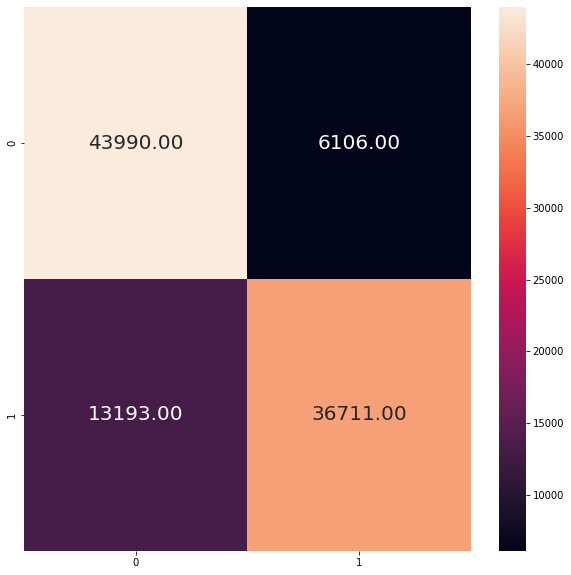

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(
    data=cm,
    annot= True,
    fmt = '.2f',
    annot_kws= {"fontsize" : 20}
)

In [93]:
# evaluating using confusion matrix
accuracy_score(sam, y_pred)

0.80701

In [94]:
# evaluating using f1 score
f1_score(sam, y_pred, pos_label=1)

0.7918594493156891

In [95]:
# evaluating using classiication report
print(classification_report(sam,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82     50096
         1.0       0.86      0.74      0.79     49904

    accuracy                           0.81    100000
   macro avg       0.81      0.81      0.81    100000
weighted avg       0.81      0.81      0.81    100000

